# XG Boost Regressor

## Importing the libraries

In [166]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [167]:
# pyspark_df = spark.table("sd_bdc_demo.xgboost_regression.2_salesforce_xgboost_updated_data")
# pyspark_df.display()
# df = pyspark_df.toPandas()

In [168]:
# Load csv file
df = pd.read_csv("2_salesforce_xgboost_updated_data/2_salesforce_xgboost_updated_data.csv")

In [169]:
print(df)

    Sales_Order                 Stage  Amount  Probability    Sales_Person  \
0          5708           Closed Lost  255000           33  Alex Rodriguez   
1          5709       Decision Makers  315000           70   Sarah Johnson   
2          5710  Proposal/Price Quote  275000           65   Michael Chang   
3          5711            Closed Won  135000           55     Emma Wilson   
4          5712    Negotiation/Review  325000           85  David Martinez   
..          ...                   ...     ...          ...             ...   
91         5799   Perception Analysis  475000           25  Alex Rodriguez   
92         5800     Value Proposition  115000           40   Sarah Johnson   
93         5801         Qualification   95000           20   Michael Chang   
94         5802            Closed Won   68000           77     Emma Wilson   
95         5803        Needs Analysis  185000           35  David Martinez   

      Company_Industry              Contact_Title          Type

In [170]:
print(df.shape)

(96, 11)


In [171]:
print(df.columns)

Index(['Sales_Order', 'Stage', 'Amount', 'Probability', 'Sales_Person',
       'Company_Industry', 'Contact_Title', 'Type', 'Lead_Source', 'State',
       'days_to_close'],
      dtype='object')


In [172]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sales_Order       96 non-null     int64 
 1   Stage             96 non-null     object
 2   Amount            96 non-null     int64 
 3   Probability       96 non-null     int64 
 4   Sales_Person      96 non-null     object
 5   Company_Industry  96 non-null     object
 6   Contact_Title     96 non-null     object
 7   Type              96 non-null     object
 8   Lead_Source       96 non-null     object
 9   State             96 non-null     object
 10  days_to_close     96 non-null     int64 
dtypes: int64(4), object(7)
memory usage: 8.4+ KB
None


## Encoding categorical data

### Encoding the Independent Variable

In [173]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = [
    'Sales_Person',
    'Company_Industry',
    'Contact_Title',
    'Type',
    'Lead_Source',
    'State'
]

# Save encoder for later use
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  


In [174]:
print(df_encoded.head())

   Sales_Order                 Stage  Amount  Probability  Sales_Person  \
0         5708           Closed Lost  255000           33             0   
1         5709       Decision Makers  315000           70             4   
2         5710  Proposal/Price Quote  275000           65             3   
3         5711            Closed Won  135000           55             2   
4         5712    Negotiation/Review  325000           85             1   

   Company_Industry  Contact_Title  Type  Lead_Source  State  days_to_close  
0                12             29     0            5     42             45  
1                11             20     0           14     23             97  
2                 8              8     0            6     39            117  
3                19             28     0           16     31             36  
4                15             41     0           10     29             92  


In [175]:
print(df_encoded.shape)

(96, 11)


In [176]:
print(df_encoded.columns)

Index(['Sales_Order', 'Stage', 'Amount', 'Probability', 'Sales_Person',
       'Company_Industry', 'Contact_Title', 'Type', 'Lead_Source', 'State',
       'days_to_close'],
      dtype='object')


## Split two Data Frame for Independent Features & Dependent Columns

In [177]:
df_independent = df_encoded.drop(columns=['Probability'])
X = df_independent
df_dependent = df_encoded[['Probability']]
y = df_dependent

In [178]:
print(df_independent.head())

   Sales_Order                 Stage  Amount  Sales_Person  Company_Industry  \
0         5708           Closed Lost  255000             0                12   
1         5709       Decision Makers  315000             4                11   
2         5710  Proposal/Price Quote  275000             3                 8   
3         5711            Closed Won  135000             2                19   
4         5712    Negotiation/Review  325000             1                15   

   Contact_Title  Type  Lead_Source  State  days_to_close  
0             29     0            5     42             45  
1             20     0           14     23             97  
2              8     0            6     39            117  
3             28     0           16     31             36  
4             41     0           10     29             92  


In [179]:
print(df_independent.shape)

(96, 10)


In [180]:
print(df_dependent.head())

   Probability
0           33
1           70
2           65
3           55
4           85


In [181]:
print(df_dependent.shape)

(96, 1)


## Splitting the dataset into the Training set and Test set (`Closed Won` & `Closed Lost` = `train`)

In [182]:
# Define which rows go into train and test based on 'Stage'
is_train = df_encoded['Stage'].isin(['Closed Won', 'Closed Lost'])

# Split X
X_train = X[is_train] 
X_test = X[~is_train]

# Split y
y_train = y[is_train]
y_test = y[~is_train]  


In [183]:
print(X_train.head())

    Sales_Order        Stage  Amount  Sales_Person  Company_Industry  \
0          5708  Closed Lost  255000             0                12   
3          5711   Closed Won  135000             2                19   
8          5716   Closed Won  235000             2                12   
12         5720   Closed Won  225000             2                 8   
17         5725   Closed Won  175000             2                12   

    Contact_Title  Type  Lead_Source  State  days_to_close  
0              29     0            5     42             45  
3              28     0           16     31             36  
8               4     2            5     38             36  
12             11     2            4     24             38  
17             48     2            5     21             40  


In [184]:
print(X_train.shape)

(25, 10)


In [185]:
print(X_test.head())

   Sales_Order                 Stage  Amount  Sales_Person  Company_Industry  \
1         5709       Decision Makers  315000             4                11   
2         5710  Proposal/Price Quote  275000             3                 8   
4         5712    Negotiation/Review  325000             1                15   
5         5713   Perception Analysis  345000             0                23   
6         5714     Value Proposition  195000             4                 6   

   Contact_Title  Type  Lead_Source  State  days_to_close  
1             20     0           14     23             97  
2              8     0            6     39            117  
4             41     0           10     29             92  
5             32     0           14     33            204  
6             20     0            2     41            158  


In [186]:
print(X_test.shape)

(71, 10)


In [187]:
print(y_train.head())

    Probability
0            33
3            55
8            47
12           76
17           67


In [188]:
print(y_train.shape)

(25, 1)


In [189]:
print(y_test.head())

   Probability
1           70
2           65
4           85
5           20
6           45


In [190]:
print(y_test.shape)

(71, 1)


## Feature Scaling
- As this is a tree based model, no need to do feature scaling

## Removing `Sales_Order` & `Stage` in `X_train` & `X_test`

In [191]:
X_train_new = X_train.drop(columns=['Sales_Order', 'Stage', 'Sales_Person'])


In [192]:
print(X_train_new.head())

    Amount  Company_Industry  Contact_Title  Type  Lead_Source  State  \
0   255000                12             29     0            5     42   
3   135000                19             28     0           16     31   
8   235000                12              4     2            5     38   
12  225000                 8             11     2            4     24   
17  175000                12             48     2            5     21   

    days_to_close  
0              45  
3              36  
8              36  
12             38  
17             40  


In [193]:
print(X_train_new.shape)

(25, 7)


In [194]:
X_test_new = X_test.drop(columns=['Sales_Order', 'Stage', 'Sales_Person'])


In [195]:
print(X_test_new.head())

   Amount  Company_Industry  Contact_Title  Type  Lead_Source  State  \
1  315000                11             20     0           14     23   
2  275000                 8              8     0            6     39   
4  325000                15             41     0           10     29   
5  345000                23             32     0           14     33   
6  195000                 6             20     0            2     41   

   days_to_close  
1             97  
2            117  
4             92  
5            204  
6            158  


In [196]:
print(X_test_new.shape)

(71, 7)


## Training the Model

In [197]:
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)


### RFE

In [198]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=xgb_model, n_features_to_select=5)
rfe.fit(X_train_new, y_train)

# selected features after RFE
selected_features = X_train_new.columns[rfe.support_]
print(selected_features)

Index(['Company_Industry', 'Type', 'Lead_Source', 'State', 'days_to_close'], dtype='object')


In [199]:
# take only selected columns for both X_train_new & X_test_new
X_train_new = X_train_new[selected_features]
X_test_new = X_test_new[selected_features]
xgb_model_train = xgb_model.fit(X_train_new, y_train.values.ravel())


## Prediction

In [200]:
y_pred = xgb_model.predict(X_test_new)

In [201]:
print(y_pred)

[61.42499  50.94671  68.31088  46.392212 65.13215  48.41975  47.268555
 62.251953 75.269264 67.96366  61.97655  56.877155 69.737755 44.887054
 57.946075 59.257763 63.69695  44.461075 58.6681   48.39655  70.097145
 62.845005 73.91456  59.317078 64.893654 55.392155 68.817116 47.12488
 57.946075 66.35281  65.630394 59.406578 74.38349  63.714954 59.09257
 68.22646  61.42499  50.508587 69.59459  71.109795 68.8336   49.43724
 44.764046 75.269264 59.34543  61.42499  50.741653 68.47463  67.79572
 56.126156 58.400845 58.47684  54.69617  68.467094 50.94671  50.539978
 54.19986  64.601    56.505173 65.86358  40.6099   59.406578 43.499977
 60.303856 60.222336 65.32788  69.55572  46.870377 50.910435 51.18955
 53.96945 ]


### Saving the output as new table

In [202]:
sales_order = X_test['Sales_Order'].values
stage = X_test['Stage'].values

In [203]:
print("sales_order shape:", sales_order.shape)
print("stage shape:", stage.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


sales_order shape: (71,)
stage shape: (71,)
y_test shape: (71, 1)
y_pred shape: (71,)


In [204]:
print(y_test)

    Probability
1            70
2            65
4            85
5            20
6            45
..          ...
90           85
91           25
92           40
93           20
95           35

[71 rows x 1 columns]


In [205]:
# Flatten y_test to 1D
y_test = y_test.values.ravel()

In [206]:
print("sales_order shape:", sales_order.shape)
print("stage shape:", stage.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


sales_order shape: (71,)
stage shape: (71,)
y_test shape: (71,)
y_pred shape: (71,)


In [207]:
print(y_test)

[70 65 85 20 45 25 30 75 60 85 25 40 30 30 70 65 80 20 45 25 35 75 60 90
 20 40 30 35 70 65 80 15 45 25 30 75 60 85 20 40 30 35 70 65 85 15 45 25
 30 30 60 20 80 40 25 15 70 90 65 75 20 35 45 30 70 60 85 25 40 20 35]


In [208]:
print(y_pred)

[61.42499  50.94671  68.31088  46.392212 65.13215  48.41975  47.268555
 62.251953 75.269264 67.96366  61.97655  56.877155 69.737755 44.887054
 57.946075 59.257763 63.69695  44.461075 58.6681   48.39655  70.097145
 62.845005 73.91456  59.317078 64.893654 55.392155 68.817116 47.12488
 57.946075 66.35281  65.630394 59.406578 74.38349  63.714954 59.09257
 68.22646  61.42499  50.508587 69.59459  71.109795 68.8336   49.43724
 44.764046 75.269264 59.34543  61.42499  50.741653 68.47463  67.79572
 56.126156 58.400845 58.47684  54.69617  68.467094 50.94671  50.539978
 54.19986  64.601    56.505173 65.86358  40.6099   59.406578 43.499977
 60.303856 60.222336 65.32788  69.55572  46.870377 50.910435 51.18955
 53.96945 ]


In [209]:
results_df = pd.DataFrame({
    'sales_order': sales_order,
    'stage': stage,
    'Actual': y_test,
    'Predicted': y_pred
})


In [210]:
# Create the folder if it doesn't exist
os.makedirs("3_1_salesforce_xgboost_prediction_data", exist_ok=True)

# Save the Excel file inside the folder
results_df.to_csv("3_1_salesforce_xgboost_prediction_data/3_1_salesforce_xgboost_prediction_data.csv", index=False)


In [211]:
# spark_df = spark.createDataFrame(results_df)
# spark_df.write.mode("overwrite").saveAsTable("sd_bdc_demo.xgboost_regression.3_1_salesforce_xgboost_prediction_data")

## Accuracy

In [212]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("r2:\n", r2_score(y_test, y_pred))
print("MAE:\n", mean_absolute_error(y_test, y_pred))
print("RMSE:\n", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:\n", mean_absolute_percentage_error(y_test, y_pred))

r2:
 -0.17051565647125244
MAE:
 21.830995559692383
RMSE:
 25.03338956796939
MAPE:
 0.712303102016449


In [213]:
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

accuracy = 100 - mape

print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


MAPE: 71.23%
Accuracy: 28.77%


## Applying k-Fold Cross Validation

In [214]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb_model, X = X_train_new, y = y_train, cv = 10)
print("Kfold Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Kfold Accuracy: -2659.78 %
Standard Deviation: 5639.22 %


## Feature Importance with `shap`

In [215]:
print(xgb_model_train.feature_importances_)


[0.09986367 0.11056312 0.544538   0.15427712 0.09075811]


<class 'shap._explanation.Explanation'>


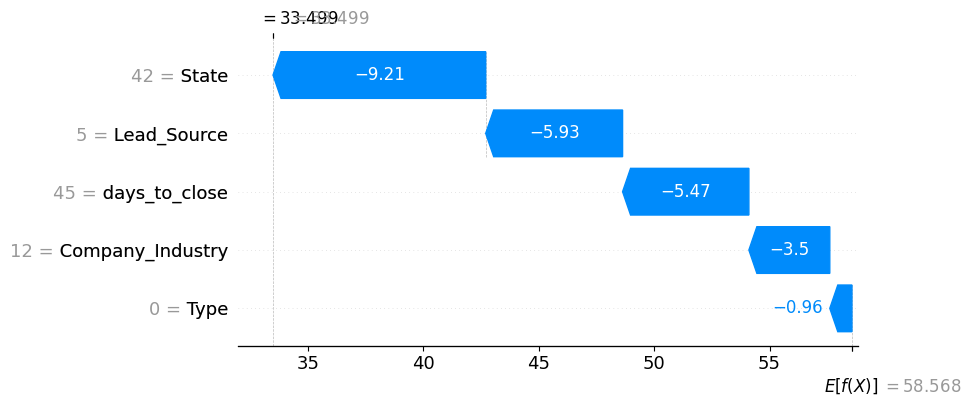

In [216]:
import shap 

explainer = shap.Explainer(xgb_model_train)
shap_values = explainer(X_train_new)
print(type(shap_values))
shap.plots.waterfall(shap_values[0])

In [217]:
print(shap_values)

.values =
array([[-3.5040386e+00, -9.5837533e-01, -5.9276581e+00, -9.2093143e+00,
        -5.4696503e+00],
       [ 1.4172301e+00, -1.9412081e-01, -6.2716632e+00,  2.6774380e+00,
        -1.2509636e+00],
       [-1.6660354e+00,  2.7720215e+00, -4.1101751e+00, -8.1355696e+00,
        -3.7986028e-01],
       [ 3.7897296e+00,  5.8913332e-01,  6.3087487e+00,  5.4862885e+00,
         1.2731062e+00],
       [-1.9265469e+00,  3.2533453e+00, -1.3946995e+00,  7.6353774e+00,
         5.9146535e-01],
       [ 7.9113178e+00,  1.5959421e-01, -6.5520322e-01,  7.2237744e+00,
         2.5613117e+00],
       [ 5.3960996e+00,  3.0257234e-02,  7.0558085e+00, -5.9512734e+00,
         6.9812310e-01],
       [-1.3733852e+00, -7.2132044e-02, -3.5208154e+00,  4.8530879e+00,
        -1.3069900e+00],
       [-2.7572777e+00,  2.2161023e-01,  4.2224865e+00,  4.1501207e+00,
        -2.5907657e-01],
       [ 3.1068988e+00,  1.0245198e-01,  4.9473343e+00,  4.1948433e+00,
        -8.5746467e-01],
       [ 1.7558135e+

In [218]:
import pandas as pd
importance_df = pd.DataFrame({
    "Feature": X_train_new.columns,
    "Mean SHAP Value": np.abs(shap_values.values).mean(axis=0)
}).sort_values(by="Mean SHAP Value", ascending=False)

print(importance_df)


            Feature  Mean SHAP Value
2       Lead_Source         5.574929
3             State         5.502728
0  Company_Industry         2.912777
4     days_to_close         1.512899
1              Type         0.717684


### Export Feature Importance

In [219]:
# Create the folder if it doesn't exist
os.makedirs("3_2_salesforce_feature_importance_data", exist_ok=True)

# Save the Excel file inside the folder
importance_df.to_csv("3_2_salesforce_feature_importance_data/3_2_salesforce_feature_importance_data.csv", index=False)


In [220]:
# spark_df = spark.createDataFrame(importance_df)
# spark_df.write.mode("overwrite").saveAsTable("sd_bdc_demo.xgboost_regression.3_2_salesforce_feature_importance_data")